# Santander Customer Transaction Prediction: Exploratory Data Analysis 

In this competition we were asked to predict if a customer will make a transaction or not, irrespective of the amount of money transacted. Thus, our goal is to solve a binary classification problem. 

The data contains 200 features, all numeric and anonymized. Furthermore, the data is likely artificial as Santander states "The data provided for this competition has the same structure as the real data we have available to solve this problem".


In this notebook,
- I uncover information about the data by visually analysing it
- I discuss the key observations and feature engineering that got me a silver medal for this competition (position 295/8802)


### Load packages

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('Set2')
plt.rcParams.update({'font.size': 16})

# Load and check data

In [202]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
print(train_df.shape)
print(test_df.shape)

(200000, 202)
(200000, 201)


In [203]:
train_df.head(8)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806


## Target distribution

`target` values:  {0, 1}
0    0.89951
1    0.10049
Name: target, dtype: float64


Text(0.5,0,'target')

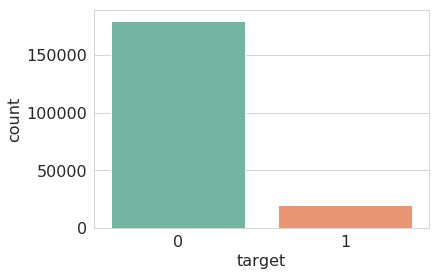

In [204]:
target = train_df['target']
print('`target` values: ', set(target.unique()))
print(target.value_counts(normalize=True))

sns.countplot(target.values)
plt.xlabel('target')

__Take away__:

- The data is imbalanced. There are ~9 times more customers who won't make a transaction ('target' = 0) than customers who will.

# Feature distributions


The data contains $200$ features of type `float` called `'var_i'` with `i=0, ..., 199`.

In [5]:
# ID_code has no usefull information
train_df.drop("ID_code", axis=1, inplace=True)
# list of the 200 feature names
features = [col for col in train_df.columns if col not in ['target']]
# Check that all features are floats64
(train_df[features].dtypes == 'float64').all()

True

Check if there's missing data:

In [6]:
# Number of columns with NaN values:
print(f'There are {train_df.isnull().any().sum()} columns containing NaN in train_df.')
print(f'There are {test_df.isnull().any().sum()} columns containing NaN in test_df.')

There are 0 columns containing NaN in train_df.
There are 0 columns containing NaN in test_df.


Let's plot the distributions:
- test vs train
- `target == 1` vs `target == 0`


All features are continuous with more or less Gaussian PDF's.

Distributions of first 8 features: showing KDE and normalized histogram for train_df and test_df.


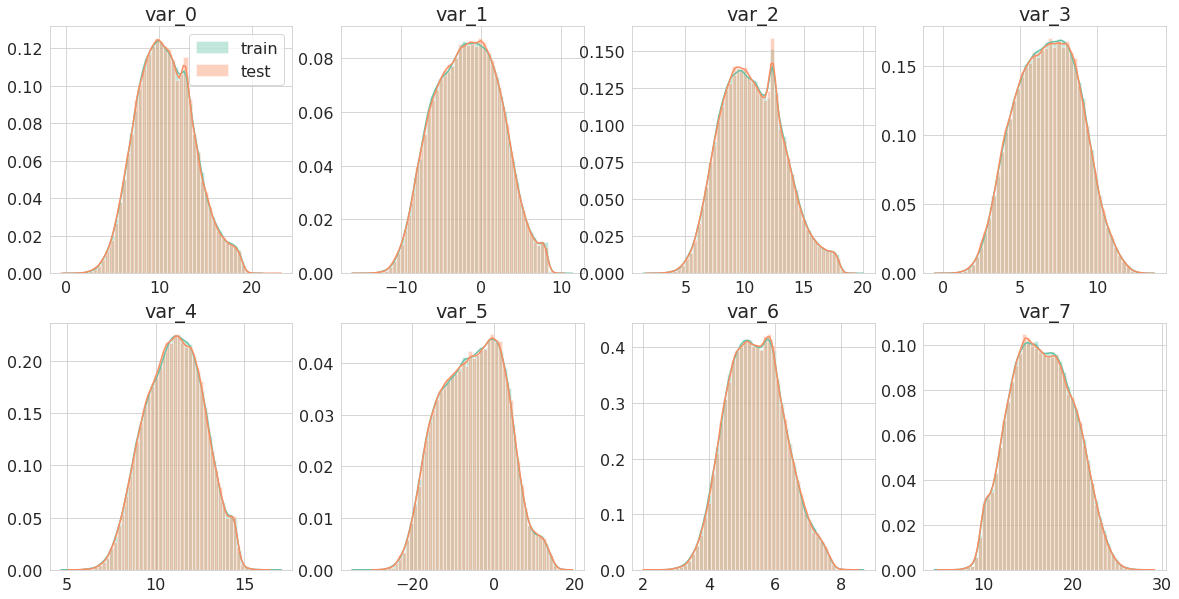

In [7]:
n_feats = 8
print(f'Distributions of first {n_feats} features: showing KDE and '
      'normalized histogram for train_df and test_df.')
nrows = (n_feats-1)//4 + 1
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*5))
for ax, col in zip(axes.flat, features[:n_feats]):
    sns.distplot(train_df[col], ax=ax, label='train')
    sns.distplot(test_df[col], ax=ax, label='test')
    ax.set_title(col)
    ax.set_xlabel('')
axes[0, 0].legend();

Distributions of first 8 features: showing KDE and normalized histogram for train_df with target = 0 and 1.


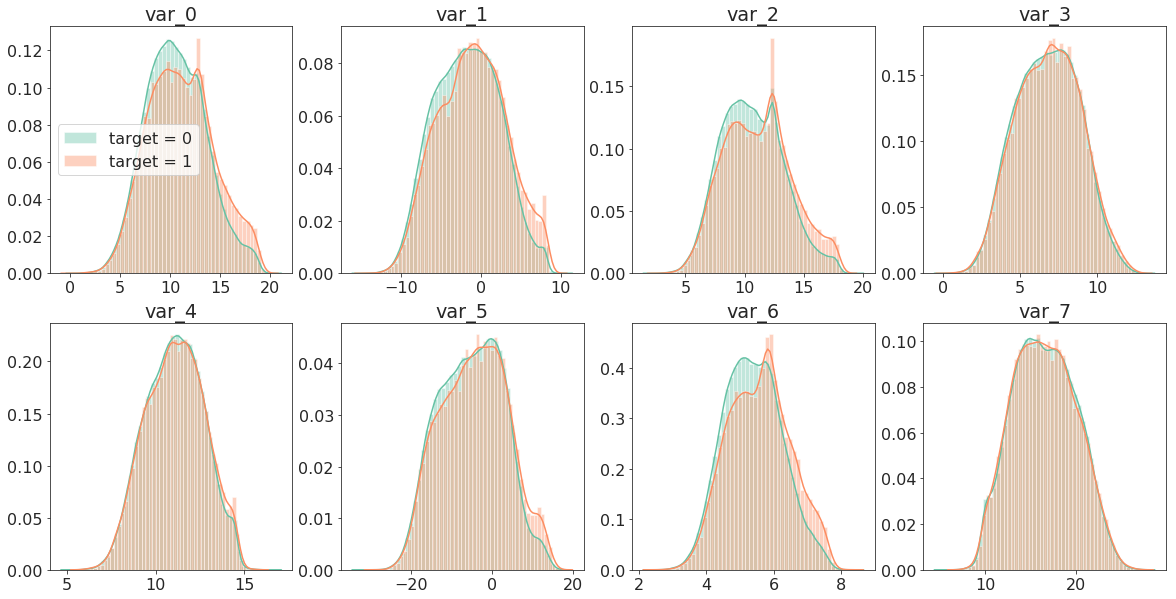

In [131]:
n_feats = 8
print(f'Distributions of first {n_feats} features: showing KDE and '
      f'normalized histogram for train_df with target = 0 and 1.')
nrows = (n_feats-1)//4 + 1
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*5))
for ax, col in zip(axes.flat, features[:n_feats]):
    sns.distplot(train_df[col][target == 0], ax=ax, label='target = 0')
    sns.distplot(train_df[col][target == 1], ax=ax, label='target = 1')
    ax.set_title(col)
    ax.set_xlabel('')
axes[0, 0].legend();

## Spikes and Clipped distributions

- Some features show pikes in their distribution, around which the proportion of target 1 data points seems to increase.


- Also, some features exhibit a sharp boundary, around which points accumulate. Only few points cross the boundary.
    Interestingly, around those boundaries, the proportion of data points with target 1 increases.
    It almost look like some features were clipped, and that noise was added after the clipping.
See plots for *var_12* and *var_81* below.


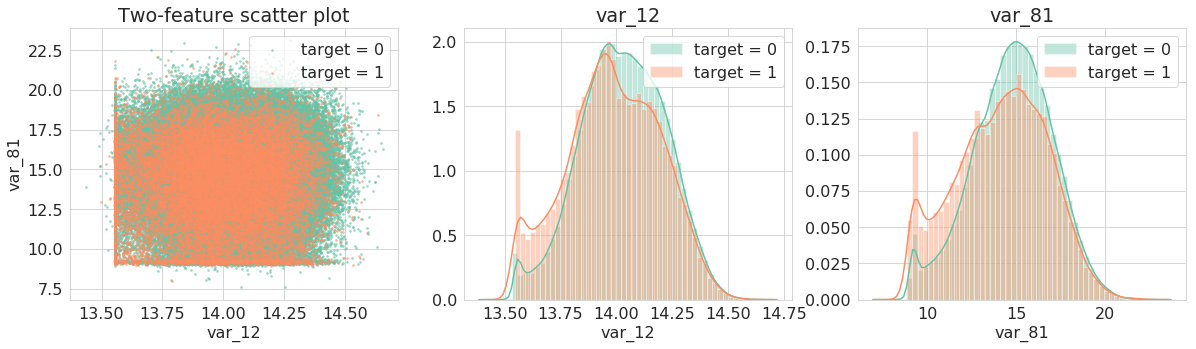

In [9]:
def two_feature_scatter_plot(var1, var2, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.scatter(train_df[var1][target == 0],
                train_df[var2][target == 0],
                alpha=0.5, s=3, label='target = 0')
    ax.scatter(train_df[var1][target == 1],
                train_df[var2][target == 1],
                alpha=0.5, s=3, label='target = 1')
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_title('Two-feature scatter plot')
    ax.legend();

    
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
two_feature_scatter_plot('var_12', 'var_81', ax=ax[0])
sns.distplot(train_df['var_12'][target==0], ax=ax[1], label='target = 0')
sns.distplot(train_df['var_12'][target==1], ax=ax[1], label='target = 1')
ax[1].set_title('var_12')
ax[1].legend()
sns.distplot(train_df['var_81'][target==0], ax=ax[2], label='target = 0')
sns.distplot(train_df['var_81'][target==1], ax=ax[2], label='target = 1')
ax[2].set_title('var_81')
ax[2].legend();


__Nevertheless__, trying to feature engineer around these observations won't add anything useful. Gradient tree boosting algorithms (such as LightGBM, which I used for my submissions) automatically split the data optimally, better than we could by manually adding features such as `is_in_a_spike = True`.

# Correlations

As I show here, the features are virtually uncorrelated, and most probably independent.


__Note__:
On the Kaggle forum, it was shown that shuffling the data on each feature/column (with a _different_ shuffle for each column) does not affect the score.
On the contrary, it can even improve it by artificially creating new data.

This is as good as it gets for empirical proofs that the features are independent.

In [207]:
train_corr = train_df[features].corr()
test_corr = test_df[features].corr()

# remove the diagonal of 1's
np.fill_diagonal(train_corr.values, np.nan)
np.fill_diagonal(test_corr.values, np.nan)

In [208]:
train_corr_bis = train_df[features].iloc[:2000].corr()
np.fill_diagonal(train_corr_bis.values, np.nan)

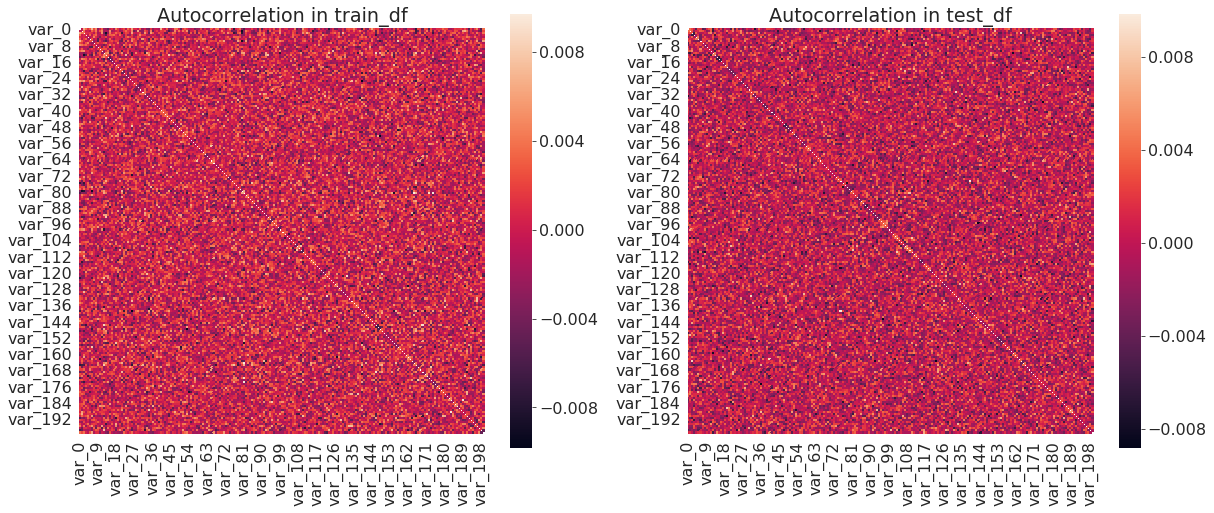

In [209]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(train_corr, ax=ax[0])
ax[0].set_aspect(1)
ax[0].set_title('Autocorrelation in train_df')

sns.heatmap(test_corr, ax=ax[1])
ax[1].set_aspect(1)
ax[1].set_title('Autocorrelation in test_df');

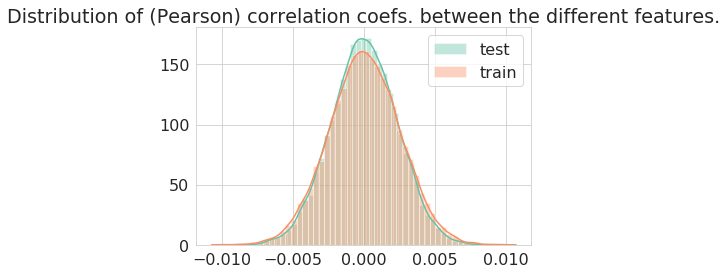

In [13]:
def plot_corr_distribution(corr, ax=None, label=None):
    if ax is None:
        ax = plt.gca()
    corr = corr.values.flatten()
    corr = corr[~np.isnan(corr)]
    sns.distplot(corr, label=label, ax=ax)


for corr, label in [(test_corr, 'test'),
                    (train_corr, 'train')]:
    plot_corr_distribution(corr, label=label)
plt.title('Distribution of (Pearson) correlation coefs. between the different features.')
plt.legend();

Take away:
- There is no linear correlation between the features.
- Shuffling the data doesn't impact the prediction $\rightarrow$ the features are independent.

# Gaussian Naive Bayes


Going one step further and assuming that our features are (conditionally) independent, let's try to fit a simple __Gaussian naive Bayes classifier__:

$$P(Y = y \,|\, \mathbf{X} = \mathbf{x}) = \frac{ P(Y = y) \prod_{i=0}^{199} P(X_i = x_i \, |\, Y = y)}{P(\mathbf{X} = \mathbf{x})} \propto  P(Y = y) \prod_{i=0}^{199} P(X_i = x_i \, |\, Y = y)$$

where $\mathbf{X} = (X_0, \dots, X_{199})$ and $\mathbf{Y}$ are random variables modeling the features and the target, respectively. Each likelihood function $P(X_i = x_i \,|\, Y = y)$ is obtained by modeling the data with a single Gaussian function.


In the following, I show a simple model that use scikit-learn's __GaussianNB__. By default, [the parameters (means and variances) are estimated using maximum likelihood](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes).

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


gnb = GaussianNB()
from sklearn.metrics import roc_curve, auc

X_train, y_train = train_df[features], target
# gnb.fit(X_train, y_train)
cross_val_score(gnb, X_train, y_train, scoring='roc_auc', cv=12).mean()

0.8884892067356844

12-fold cross-validation score of 0.888 for the AUC of the ROC curve with the simplest naive Bayes model (and a similar public score on the test data)... that's already very good!

Here is the ROC curve when fitting on the whole data set:

AUC = 0.8899667114457852


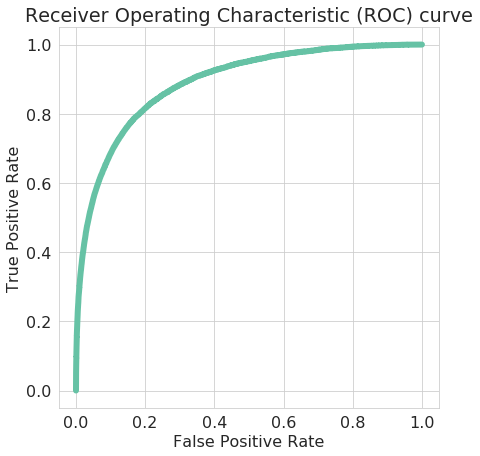

In [15]:
from sklearn.metrics import roc_curve, auc

gnb.fit(X_train, y_train)
false_positive_rate, true_positive_rate, _ = roc_curve(y_train, gnb.predict_proba(X_train)[:,1])
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(false_positive_rate, true_positive_rate, lw=6)
ax.set_aspect(1)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) curve')
print('AUC =', auc(false_positive_rate, true_positive_rate))

# Light Gradient Boosting Machine (LightGBM)

This score is our benchmark for better algorithms. In my submissions, I used the popular LightGBM algorithm. Unlike the  Gaussian NB method, it does not make any assumption but utilize the whole information present in the distribution of each feature.

However, because of the the peculiarity of the data set, namely the independence of all the features, some care has to be taken while choosing the parameters of the model. In particular:

Against over-fitting:
- Very low `feature_fraction = 0.05` (default = `1.0`)! There is no correlation between the features. This prevents over-fitting by focusing on individual features instead of needlessly looking for interactions.

- Low `num_leaves = 13` (default = `31`) to avoid overly complex trees and over-fitting, due of the lack of interaction.

- Higher `min_data_in_leaf = 80` (default = `20`), also to avoid over-fitting, due to the lower `num_leaves` parameter. A value too high could cause under-fitting.
- High `min_sum_hessian_in_leaf = 10` (default = `1e-3`), for the same reason.

For better accuracy:
- `learning_rate = 0.01` (default = `0.1`)

For faster speed (can also reduce over-fitting):
- `bagging_fraction = 0.4` (default = `1.0`), use subsamples of the data.
- `bagging_freq = 5` (default = `0`, disabled), frequency of bagging.



LightGBM with the above parameters give a AUC ROC score of 0.900 or 0.901 with data augmentation (creation of new data with random shuffles of the data for each feature, splitting by `target`, while up-sampling the positive instances)


# Feature Engineering


The above model only uses the raw data. Since the features are independent, what else could we do to improve the prediction? How can there be more information than in the distribution of the features, which should already be maximally utilized by the LightGBM algorithm? <br>

That's the question I asked myself many times, until something clicked.
In the following, I explain the key observation I made, which by itself boosted my score enough to get a silver medal.



- All the features are rounded to the fourth decimal: some features kind of act like categorical variables with high cardinality


## Count statistics

Let's look at the __numbers of occurrences__ (or __value counts__ or __frequencies__) of the values for each feature: this is the 'magic' of this dataset.

Then I calculate the single-feature predictions using a basic LightGBM with two features:
- the values
- the corresponding value counts

By plotting a heatmap of the prediction for some features, we see below that __values and counts are non-trivially correlated!!__


In particular, the predicted probability is sensitive to unique/rare values (weather `counts > 1` or `counts == 1`)

In the following, I show a `count` vs `value` heatmap of the probability for selected features.

Heatmaps of the single-feature prediction probability of `target = 1` for 6 random features


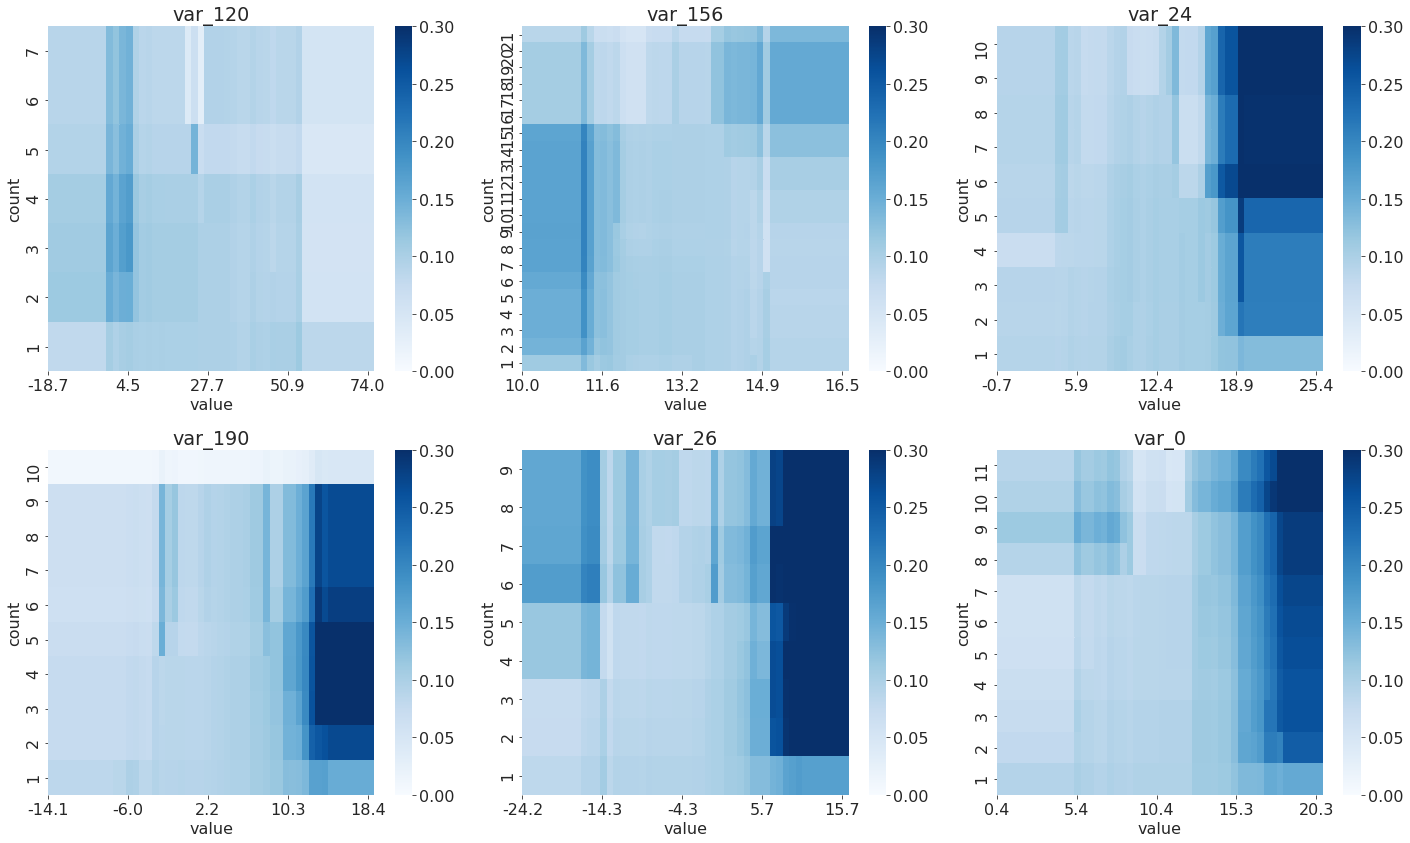

In [199]:
def n_occurrences(feature):
    """
    Parameters
    ----------
    feature: pandas.Series
    
    Returns
    -------
    n_occurrences: numpy.array (of the same length as `feature`)
        number of occurrences of each element in `feature`
        n_occurrences[i] = feature.value_counts()[feature[i]]
    """
    return feature.value_counts()[feature].values


import lightgbm as lgb

def single_feature_prediction_heatmap(var, ax=None): 
    """Plot a 'value' vs 'value count' heatmap of the prediction probabilities"""
    
    X_train = np.array(
        [train_df[var],  n_occurrences(train_df[var])]
    ).T
    y_train = target
    
    train_data = lgb.Dataset(X_train, label=y_train)
    params = {'objective': 'binary', 'metric': 'auc', 'num_leaves': 4}
    lgb_clf = lgb.train(
        params,
        train_data,
    )
    # create grid of probabilities for all values of (var, var_occ)
    n_values, v_min, v_max = 50, X_train[:, 0].min(), X_train[:, 0].max()
    c_max = int(X_train[:, 1].max())
    values = np.linspace(v_min, v_max, n_values)
    counts = np.array(range(1, c_max+1))
    
    values_grid, counts_grid = np.meshgrid(values, counts)
    grid_df = pd.DataFrame(
        {var: values_grid.flatten(),
         'count': counts_grid.flatten()}
    )
    grid_df['prediction'] = lgb_clf.predict(grid_df)
    
    if ax is None:
        ax = plt.gca()
        
    pivot = np.array(grid_df.pivot(index='count', columns=var, values='prediction'))
    pivot = np.flip(pivot, axis=0)
    sns.heatmap(pivot, cmap='Blues', vmin=0, vmax=0.3, ax=ax)
    ax.set_xticks(np.linspace(0, n_values-1, 5))
    ax.set_xticklabels(np.round(np.linspace(v_min, v_max, 5), 1), rotation=0)
    ax.set_yticks(np.arange(c_max) + 0.5)
    ax.set_yticklabels(range(c_max, 0, -1))
    ax.set_title(var)
    ax.set_xlabel('value')
    ax.set_ylabel('count')
 
sns.set_style("ticks")
n_feats = 6
print(f'Heatmaps of the single-feature prediction probability of `target = 1` for {n_feats} random features')
nrows = (n_feats-1)//3 + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*6))
for ax, feat in zip(axes.flat, np.random.choice(features, n_feats, replace=False)):
    single_feature_prediction_heatmap(feat, ax)
plt.tight_layout()
plt.show()
 

Take away: 
-  __For each feature, values with a `count > 1` are more likely to have `target` equal to 1!__



How does that make sense? The variables are seemingly continuous; there shouldn't be any information in the frequency counts, even after binning! However, manipulation of the data by Santander could be the explanation. For instance:

- The data could have been up-sampled to generate more data of the class `target = 1`: this creates additional data points, but no new values, hence the higher value counts.

- Some fillna or other preprocessing was done using interpolation/extrapolation, creating more unique values for the `target = 0` class. 

- The variables were originally not continuous but were created from some categorical variables... Continuous variables are indeed quite unusual for customer/business data.

# Fake test data

The new `n_occurrences` features should be evaluated using both train and test data.
However, there is a trap: there is fake data in the test dataset.
- Half of the samples in the test dataset have no unique values (all `n_occurrences > 1`): they are not real data and were artificially added by sampling from the other half of the test data.

- Only the real test samples should be used to create de new features.

In [200]:
test_val = test_df.drop(['ID_code'], axis=1).values
unique_samples = []

# For each feature, identify the unique values in test_df
unique_count = np.zeros_like(test_val)
for feature in range(test_val.shape[1]):
    _, index, count = np.unique(test_val[:, feature], return_counts=True,
                                return_index=True)
    unique_count[index[count == 1], feature] += 1

    
# Samples in test that have unique values are real, the others are fake
# The fake data is not taken into account for the evaluation of n_occurrences
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes =  np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(f'There are {len(real_samples_indexes)} real test samples.')
print(f'There are {len(synthetic_samples_indexes)} synthetic test samples.')
real_test_df = test_df.iloc[real_samples_indexes]

There are 100000 real test samples.
There are 100000 synthetic test samples.


# Outlook

- By adding a new `n_occurrences` feature for each 200 original feature, filtering out the fake test samples, and by training using the same LightGBM model, I obtained a public score of around $0.903$, and a silver medal (295/8802). You can find my script [here](lgb_script.py).

- I could have done better by tuning the hyperparameters of the model: there is interaction between the new features and the original ones. By setting `feature_fraction = 1.0`, I get a score of 0.910.
    
- In order to allow for interaction only between each pair of features (`var_i`, `var_i_n_occurrences`), we could train 200 two-feature models and then assemble them using a naive Bayes formulation (assuming conditional independence):
    
$$P(Y=y \,|\, \mathbf{X} = \mathbf{x}) = \frac{P(Y = y) \prod_{i} P(X_i = x_i \,|\, Y=y)}{P(\mathbf{X}=\mathbf{x})} \propto P(Y=y) \prod_i \frac{P(Y=y \,|\, X_i = x_i)}{P(Y=y)}$$